In [1]:
import os, sys, re, collections, string
from operator import itemgetter as at
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
sys.path.append("../python")
import data
%matplotlib inline

Read the data
---

In [2]:
df = data.asDataFrame()
df

,file,tag
num,,
41270,bylaws-41270.txt,bylaws
8840,employment-08840.txt,employment
29480,rsu-29480.txt,rsu
1520,SPA-01520.txt,SPA
170,SPA-00170.txt,SPA
38150,rra-38150.txt,rra
13290,employment-13290.txt,employment
2840,credit-02840.txt,credit
12830,employment-12830.txt,employment


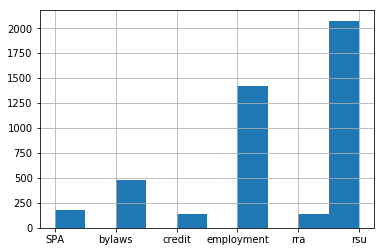

In [3]:
df.tag.hist()

In [4]:
print(data.readFile("employment-10964.txt"))

None


In [5]:
i = 0
for tag, body in data.getIterator():
    print ("="* 100)
    print (tag)
    print ("-"* 100)
    print (body[:1000])
    i+=1
    if i>=3:
        break

bylaws
----------------------------------------------------------------------------------------------------
  
  


Exhibit 3.1

  


  


  


  


  




OF

NEW PEOPLES BANKSHARES, INC.

  


(restated in electronic format as of March 17, 2004)

  


  


  
  
  


  


  


* * *

  
  


TABLE OF CONTENTS

  


  


ARTICLE 1 – SHARES 

4

  


Section 1.

Certificates 

4

Section 2.

Signatures 

4

Section 3.

Duplicate Certificates 

4

Section 4.

Transfer of Shares 

4

Section 5.

Restrictions on Transfer 

4

  


ARTICLE II – SHAREHOLDERS 

4

  


Section 1.

Holders of Shares 

4

Section 2.

Meetings Generally 

4

Section 3.

Annual Meetings 

5

Section 4.

Special Meetings 

5

Section 5.

Notice 

5

Section 6.

Determination of Shareholders of Record 

5

Section 7.

Conduct of Meetings 

5

Section 8.

Proxies 

6

Section 9.

Procedure at Meetings 

6

Section 10.

Shareholder Proposals 

6

Section 11.

Quorum and Voting 

7

Section 12.

Inspectors 

7

Secti

Preprocess
---

In [6]:
sample_doc = data.readFile("SPA-00150.txt")
print (sample_doc)

  
QuickLinks \-- Click here to rapidly navigate through this document

EXHIBIT 10.11.1 

  
WESTAFF, INC.  
  



I hereby elect to participate in the Employee Stock Purchase Plan (the "ESPP") beginning with the purchase period specified below, and I hereby subscribe to purchase shares of Common Stock of Westaff, Inc. (the "Corporation") in accordance with the provisions of this Agreement and the ESPP. I hereby authorize payroll deductions from each of my paychecks following my entry into the ESPP in the 1% multiple of my cash earnings (not to exceed a maximum of 10%) specified in my attached Enrollment/Change Form. 

Purchase periods under the ESPP will run from the first business day in February to the last business day in July each year, and from the first business day in August each year to the last business day in January of the following year. My participation will automatically remain in effect from one purchase period to the next in accordance with this Agreement and my payrol

### Replacing uninformative tokens
In this example we replace all numeric tokens with a `<NUM>` token

In [7]:
digits = re.compile(r"\d[\d\.\$]*")
sample_doc = digits.sub("<NUM>", sample_doc)
print (sample_doc)

  
QuickLinks \-- Click here to rapidly navigate through this document

EXHIBIT <NUM> 

  
WESTAFF, INC.  
  



I hereby elect to participate in the Employee Stock Purchase Plan (the "ESPP") beginning with the purchase period specified below, and I hereby subscribe to purchase shares of Common Stock of Westaff, Inc. (the "Corporation") in accordance with the provisions of this Agreement and the ESPP. I hereby authorize payroll deductions from each of my paychecks following my entry into the ESPP in the <NUM>% multiple of my cash earnings (not to exceed a maximum of <NUM>%) specified in my attached Enrollment/Change Form. 

Purchase periods under the ESPP will run from the first business day in February to the last business day in July each year, and from the first business day in August each year to the last business day in January of the following year. My participation will automatically remain in effect from one purchase period to the next in accordance with this Agreement and my p

### Remove punctuation and unknown charactars

In [8]:
not_allowed = re.compile(r"[^\s\w<>_]")
sample_doc = not_allowed.sub("", sample_doc)
print (sample_doc)

  
QuickLinks  Click here to rapidly navigate through this document

EXHIBIT <NUM> 

  
WESTAFF INC  
  



I hereby elect to participate in the Employee Stock Purchase Plan the ESPP beginning with the purchase period specified below and I hereby subscribe to purchase shares of Common Stock of Westaff Inc the Corporation in accordance with the provisions of this Agreement and the ESPP I hereby authorize payroll deductions from each of my paychecks following my entry into the ESPP in the <NUM> multiple of my cash earnings not to exceed a maximum of <NUM> specified in my attached EnrollmentChange Form 

Purchase periods under the ESPP will run from the first business day in February to the last business day in July each year and from the first business day in August each year to the last business day in January of the following year My participation will automatically remain in effect from one purchase period to the next in accordance with this Agreement and my payroll deduction authoriz

### Putting it all together

In [9]:
def clean_text(text):
    return not_allowed.sub("", digits.sub("<NUM>",text.lower()))

Bag of words vecorization
---

In [10]:
def bag_of_words(text):
    return collections.Counter(text.split())

In [11]:
bag_of_words("My dog is bigger than your dog")

Counter({'My': 1, 'bigger': 1, 'dog': 2, 'is': 1, 'than': 1, 'your': 1})

In [12]:
vocabulary = ["dog", "cat", "bigger"]
def BOW_vector(text):
    return at(*vocabulary)(bag_of_words(text))

In [13]:
BOW_vector("My dog is bigger than your dog")

(2, 0, 1)

## Preparing for modelling

In [14]:
vocabulary = ["share", "stock", "loan", "obligation", "agreement", "employee"]
df = data.asDataFrame(vectorizer=BOW_vector)
df

,vector,tag
num,,
41270,"(11, 6, 0, 0, 2, 1)",bylaws
8840,"(0, 0, 0, 2, 5, 4)",employment
29480,"(0, 7, 0, 0, 2, 0)",rsu
1520,"(0, 4, 0, 0, 1, 0)",SPA
170,"(0, 1, 0, 6, 5, 1)",SPA
38150,"(1, 7, 0, 2, 1, 0)",rra
13290,"(1, 6, 0, 2, 6, 5)",employment
2840,"(0, 0, 4, 0, 2, 0)",credit
12830,"(0, 4, 0, 4, 4, 3)",employment


In [15]:
X = df.vector
y = df.tag